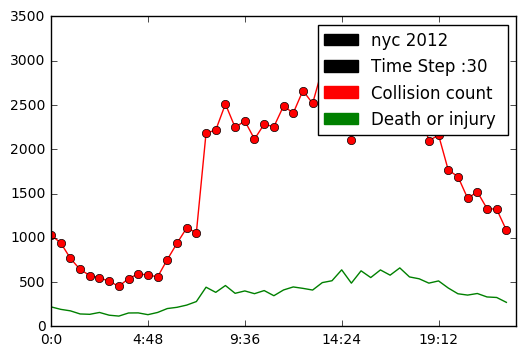

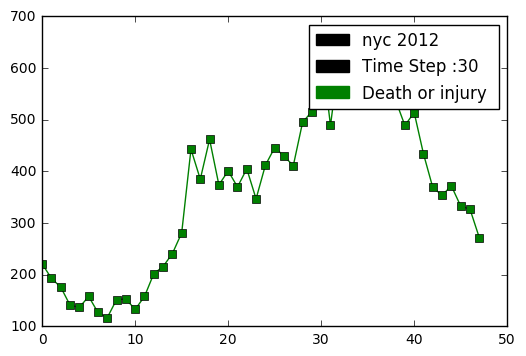

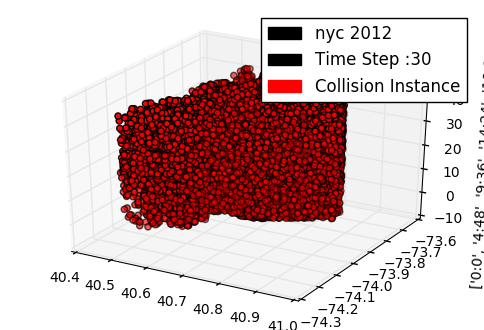

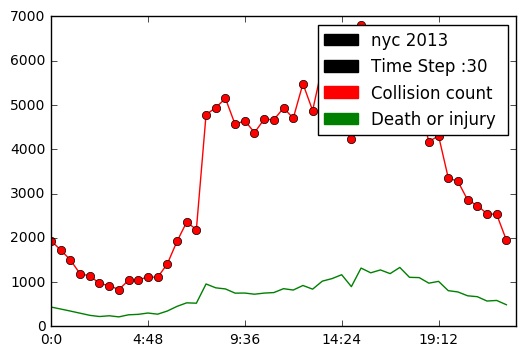

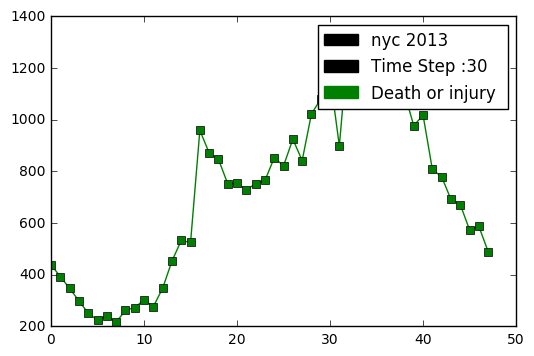

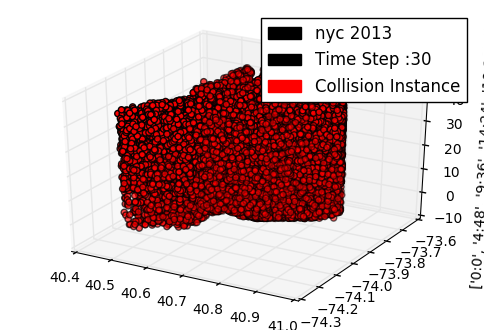

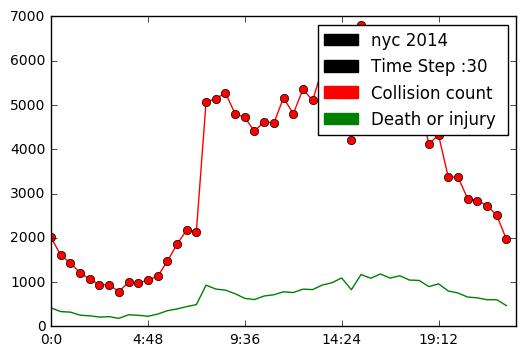

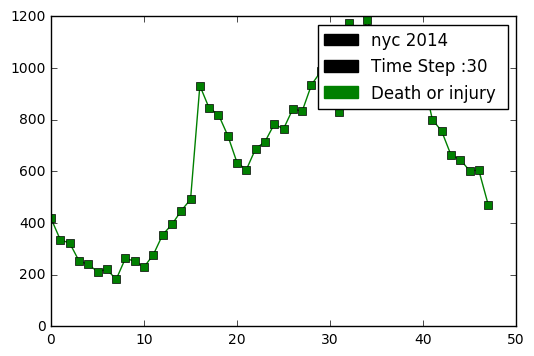

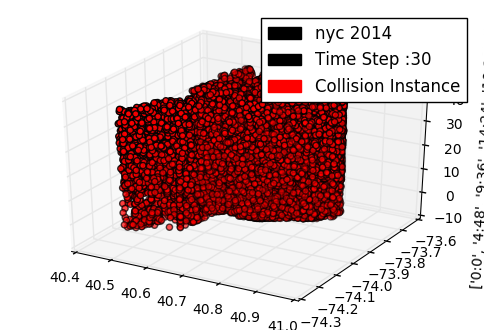

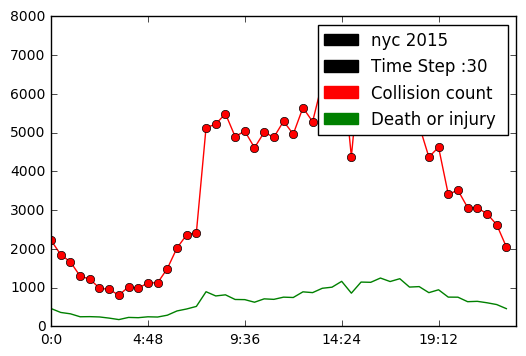

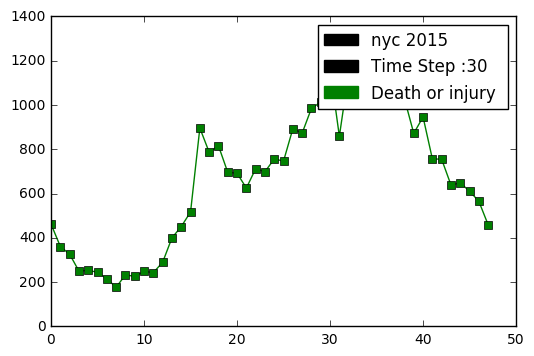

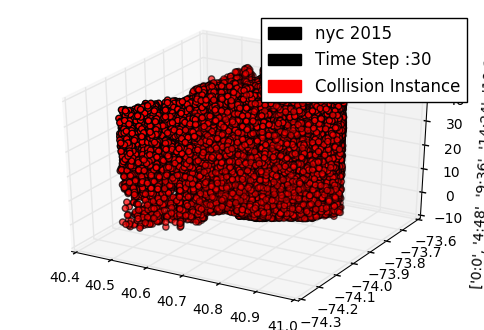

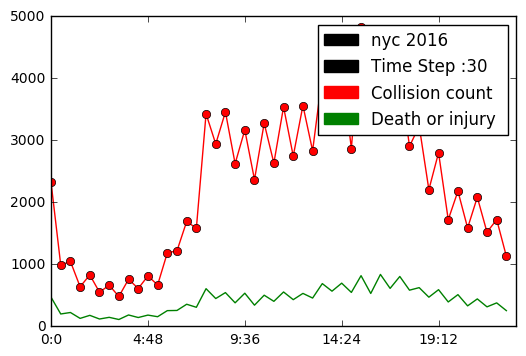

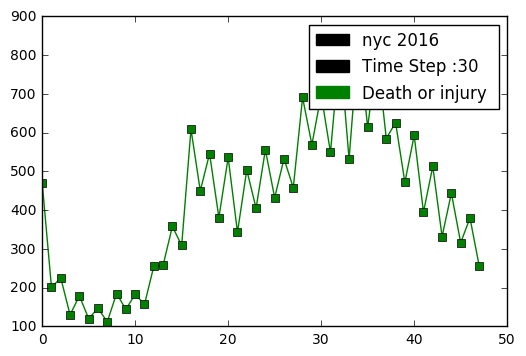

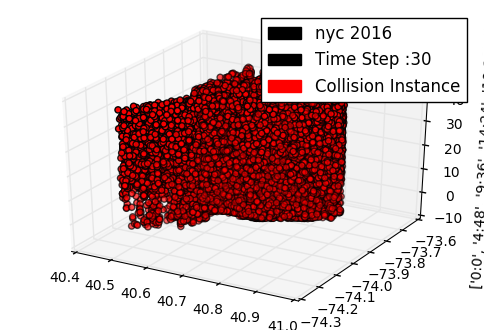

In [2]:
###########
# Bounding box of New york City :
#  40.917577, -74.25909,
#  40.477399, -73.70000
############
# Radius of earth 6371.009 Km
# Units used for geographical distance : Km
############
# TODO: Use bigfloat

%matplotlib inline

import csv
import math
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt;
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

class location:
    lat = 0;
    lon = 0;
    R = 6371.009

    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon

    def degrees_to_radians_aux(self, value):
        return (value * math.pi) / 180;

    # return distance between the location,and another location point(object)
    def distance(self, loc2):
        dlon = abs(loc2.lon - self.lon)
        dlat = abs(loc2.lat - self.lat)
        mean_lat = (self.lat + loc2.lat) / 2;
        dist = self.R * math.sqrt(self.degrees_to_radians_aux(dlat) ** 2 +
                                  (math.acos(self.degrees_to_radians_aux(mean_lat)) * self.degrees_to_radians_aux(
                                      dlon)) ** 2)
        return dist;


def plot_basic_map(city):
    # 40.917577, -74.25909,
    # 40.477399, -73.70000
    my_map = Basemap(projection='merc',
                     resolution='h',
                     lat_0=40.5,
                     lon_0=-73.7,
                     llcrnrlat=40.0,
                     llcrnrlon=-74.4,
                     urcrnrlat=41.0,
                     urcrnrlon=-73.0)

    my_map.fillcontinents(color='yellow')
    my_map.drawmapboundary(fill_color='aqua')
    my_map.drawcoastlines()
    my_map.drawcountries()
    return my_map;


def plot_points(city, year, map_obj):
    Filename = city + '_' + str(year) + '.csv'
    x = []
    y = []
    with open(Filename, 'r') as csvfile:
        rd = csv.reader(csvfile)
        for row in rd:
            x.append(float(row[2]))  # latitude
            y.append(float(row[3]))  # longitude

    for i in range(len(x)):
        lon = y[i]
        lat = x[i]
        x1, y1 = map_obj(lon, lat)
        map_obj.plot(x1, y1, marker='o', markersize=1, color='m')


# map_obj = plot_basic_map('nyc')
# plot_points('nyc', 2014, map_obj)
# plt.show()

def create_time_buckets(granularity):
    b = [];
    for i in range((24 * 60) / granularity):
        b.append(i);
    return b;

def create_time_labels(time_ticks,granularity) :
    labels = [];
    label_interval = float(24 * 60 / granularity) / (len(time_ticks) - 1)
    z = 0;
    for i in range(len(time_ticks)):
        labels.append(str(z / 60) + ':' + str(z % 60))
        z += int(label_interval * granularity)
    return labels;

def collisons_by_time(city, year):
    Filename = city + '_' + str(year) + '.csv';
    granularity = 30
    x = create_time_buckets(granularity);
    coll = [];
    death_injury = [];

    for i in range(len(x)):
        coll.append(0);
        death_injury.append(0);

    with open(Filename, 'r') as csvfile:
        rd = csv.reader(csvfile)
        for row in rd :
            time = row[1]
            time_parts = time.split(':');
            hr = int(time_parts[0])
            min = int(time_parts[1])
            index = (hr * 60 + min) / granularity;
            coll[index] += 1
            c = int(row[4])
            if c > 0 :
                death_injury[index] += 1;

    ax =plt.axes()
    plt.xlim(0,len(coll))

    #location of x asis labels
    time_ticks = ax.xaxis.get_majorticklocs()
    labels = create_time_labels (time_ticks,granularity)
    ax.xaxis.set_ticklabels(labels)
    plt.plot(x, coll,'ro-')
    plt.plot(x, death_injury, 'g-')
    red_patch = mpatches.Patch(color='red', label='Collision count')
    green_patch = mpatches.Patch(color='green', label='Death or injury ')
    city_patch = mpatches.Patch(color ='black', label =city+' '+str(year))
    gran_patch= mpatches.Patch(color='black', label ='Time Step :' + str(granularity) )
    plt.legend(handles=[city_patch,gran_patch,red_patch,green_patch])
    plt.show()

    plt.plot(x, death_injury, 'gs-')
    plt.legend(handles=[city_patch, gran_patch, green_patch])
    #plt.show()
    return;


def collisions_by_time_loc(city,year):
    Filename = city + '_' + str(year) + '.csv';
    granularity = 30
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    time_buckets = create_time_buckets(granularity);
    x = [] #latitude
    y = [] #longitude
    z = [] #time

    with open(Filename, 'r') as csvfile:
        rd = csv.reader(csvfile)
        for row in rd:
            x.append(float(row[2]))
            y.append(float(row[3]))
            time = row[1]
            time_parts = time.split(':');
            hr = int(time_parts[0])
            min = int(time_parts[1])
            index = (hr * 60 + min) / granularity;
            z.append(index)

    time_ticks = ax.xaxis.get_majorticklocs()
    labels = create_time_labels(time_ticks, granularity)
    ax.set_zlabel(labels)
    ax.scatter(x, y, z, c='r', marker='o')
    red_patch = mpatches.Patch(color='red', label='Collision Instance')
    city_patch = mpatches.Patch(color='black', label=city + ' ' + str(year))
    gran_patch = mpatches.Patch(color='black', label='Time Step :' + str(granularity))
    ax.legend(handles=[city_patch, gran_patch, red_patch])
    plt.show()

plot_basic_map(nyc)

years = [2012,2013,2014,2015,2016]
for y in years:
    collisons_by_time('nyc', y)
    collisions_by_time_loc('nyc',y);